In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [7]:
def show(img, title="Image"):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis("off")


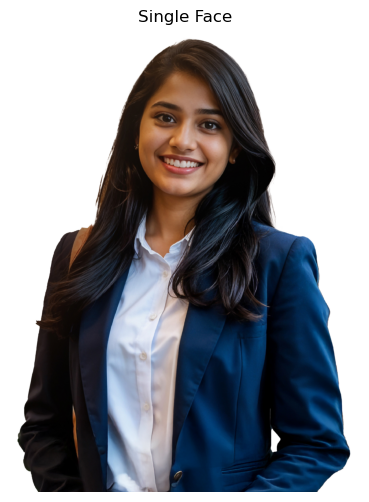

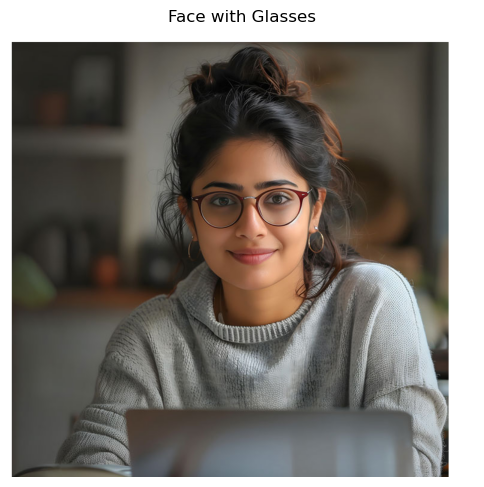

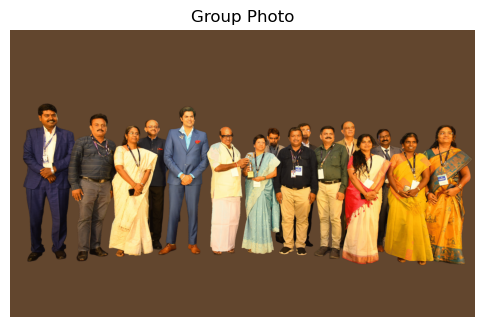

In [8]:
img_single = cv2.imread("image_01.png")
img_glasses = cv2.imread("image_02.png")
img_group = cv2.imread("image_03.png")

show(img_single, "Single Face")
show(img_glasses, "Face with Glasses")
show(img_group, "Group Photo")


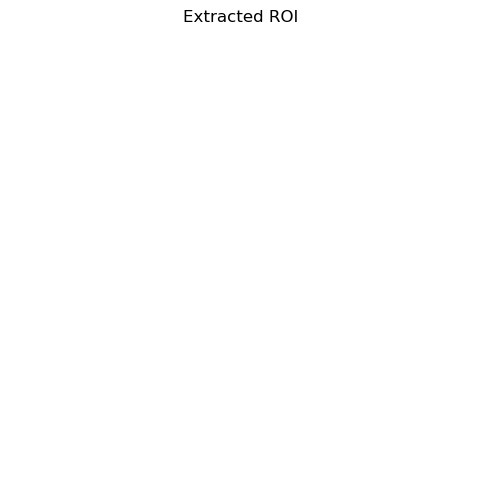

In [9]:
# Example: Extracting the top-left 200x200 region from the single face image
roi = img_single[50:250, 50:250]
show(roi, "Extracted ROI")


In [10]:
def detect_faces(img, scaleFactor=1.1, minNeighbors=4):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)

    output = img.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return output, faces


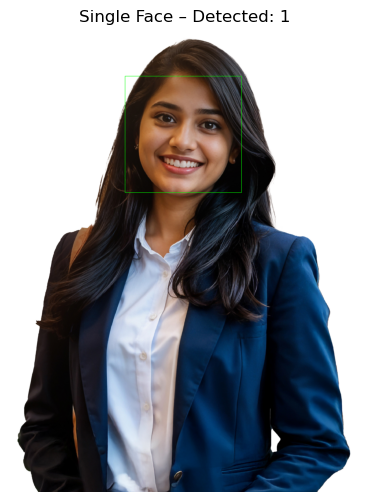

In [11]:
out_single, faces_single = detect_faces(img_single)
show(out_single, f"Single Face – Detected: {len(faces_single)}")

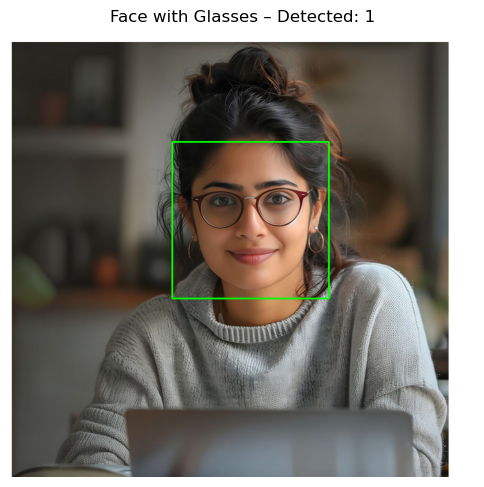

In [12]:
out_glasses, faces_glasses = detect_faces(img_glasses)
show(out_glasses, f"Face with Glasses – Detected: {len(faces_glasses)}")

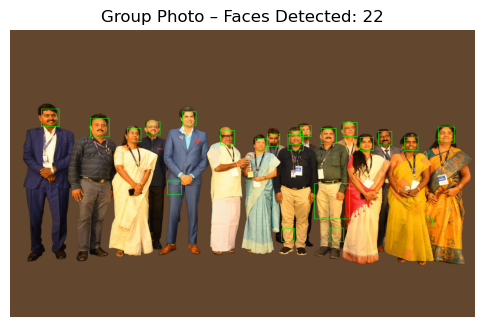

In [13]:
out_group, faces_group = detect_faces(img_group)
show(out_group, f"Group Photo – Faces Detected: {len(faces_group)}")

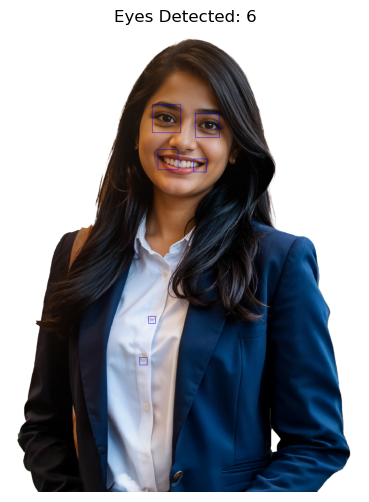

In [14]:
def detect_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    output = img.copy()
    for (x, y, w, h) in eyes:
        cv2.rectangle(output, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return output, eyes

eyes_out, eyes = detect_eyes(img_single)
show(eyes_out, f"Eyes Detected: {len(eyes)}")


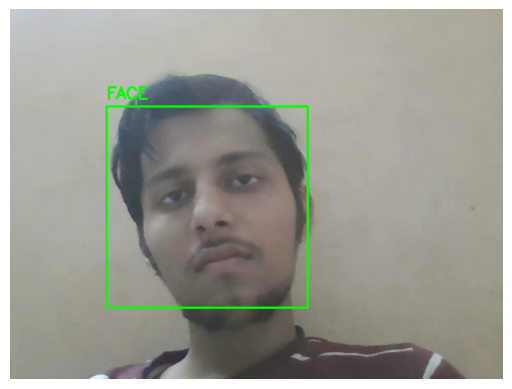

In [ ]:
import time
from IPython.display import clear_output

cap = cv2.VideoCapture(0)

plt.ion()  # interactive mode

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, "FACE", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)

    clear_output(wait=True)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    plt.pause(0.001)

cap.release()
plt.close()